In [1]:
import yfinance as yf

In [22]:
df=yf.download("WIPRO.NS")

[*********************100%%**********************]  1 of 1 completed


In [24]:
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-14 00:00:00+05:30,401.660671,401.660671,394.578110,395.575653,8811714,0.0,0.0
2022-11-15 00:00:00+05:30,397.071977,398.568291,393.031940,396.174194,6231356,0.0,0.0
2022-11-16 00:00:00+05:30,398.019642,400.713020,395.226533,397.271484,5519764,0.0,0.0
2022-11-17 00:00:00+05:30,396.922345,397.022106,394.029477,395.775177,3028808,0.0,0.0
2022-11-18 00:00:00+05:30,396.872465,397.919873,391.834855,392.882294,4773101,0.0,0.0


In [25]:
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-07 00:00:00+05:30,384.899994,387.000000,382.850006,383.299988,2846089,0.0,0.0
2023-11-08 00:00:00+05:30,384.600006,385.850006,381.500000,382.200012,3551026,0.0,0.0
2023-11-09 00:00:00+05:30,383.000000,384.000000,379.700012,380.850006,4615563,0.0,0.0
2023-11-10 00:00:00+05:30,380.299988,381.799988,377.000000,379.299988,5355350,0.0,0.0
2023-11-13 00:00:00+05:30,382.600006,382.899994,380.000000,381.649994,1792951,0.0,0.0


In [26]:
import matplotlib.pyplot as plt

# Historical Data Visualization

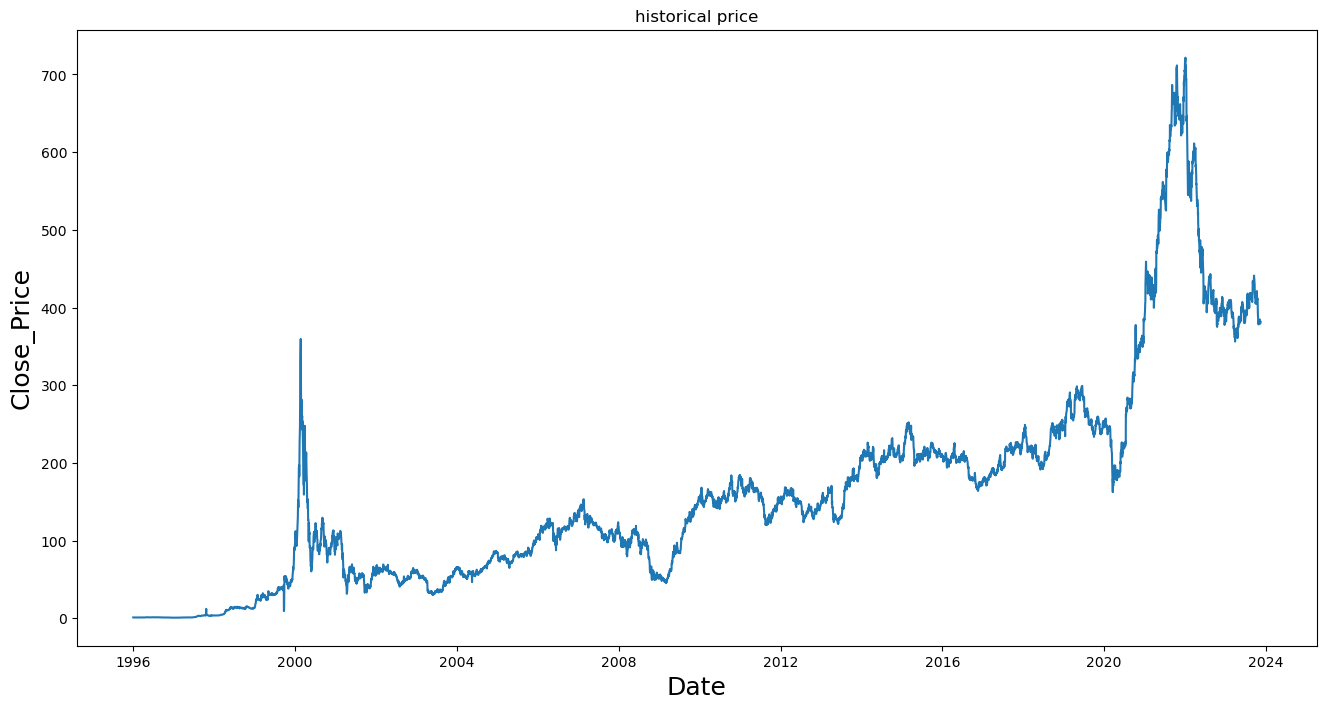

In [27]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [29]:
import numpy as np

In [30]:
data = df.filter(['Close'])
df = np.array(data).reshape(-1,1)
df

array([[  1.125     ],
       [  1.03750002],
       [  1.07500005],
       ...,
       [380.8500061 ],
       [379.29998779],
       [381.6499939 ]])

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[4.96023166e-04],
       [3.74618934e-04],
       [4.26649366e-04],
       ...,
       [5.27355858e-01],
       [5.25205243e-01],
       [5.28465823e-01]])

In [33]:
import math 

In [34]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5606

In [35]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00049602, 0.00037462, 0.00042665, 0.00042665, 0.00042665,
       0.00042665, 0.00042665, 0.00042873, 0.00042665, 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00041971, 0.00039196,
       0.00041971, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.00039196, 0.00038   , 0.00038   , 0.00038   , 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.0004263 , 0.0004263 , 0.0004263 , 0.0004263 , 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00044399, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00048735,
       0.00048735, 0.00049602, 0.00039214, 0.00039214, 0.00041277,
       0.00046134, 0.00046151, 0.00046151, 0.00046151, 0.00046151])]
[0.00046150960565661376]



In [36]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5546, 60, 1)

# Modeling

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [40]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
139/139 [==============================] - 19s 56ms/step - loss: 9.9839e-04
Epoch 2/20
139/139 [==============================] - 8s 54ms/step - loss: 1.2871e-04
Epoch 3/20
139/139 [==============================] - 8s 56ms/step - loss: 1.1521e-04
Epoch 4/20
139/139 [==============================] - 10s 70ms/step - loss: 9.6415e-05
Epoch 5/20
139/139 [==============================] - 8s 57ms/step - loss: 8.5620e-05
Epoch 6/20
139/139 [==============================] - 9s 62ms/step - loss: 7.9332e-05
Epoch 7/20
139/139 [==============================] - 9s 63ms/step - loss: 7.3540e-05
Epoch 8/20
139/139 [==============================] - 8s 60ms/step - loss: 8.6759e-05
Epoch 9/20
139/139 [==============================] - 9s 64ms/step - loss: 7.1809e-05
Epoch 10/20
139/139 [==============================] - 8s 58ms/step - loss: 7.4672e-05
Epoch 11/20
139/139 [==============================] - 9s 67ms/step - loss: 6.1755e-05
Epoch 12/20
139/139 [=============================

In [41]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [42]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

44/44 [==============================] - 2s 17ms/step


8.060872951292463

# Visualization of Test Data VS Predicted Data

C:\Users\HP\AppData\Local\Temp\ipykernel_9572\3699947006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions'] = predictions


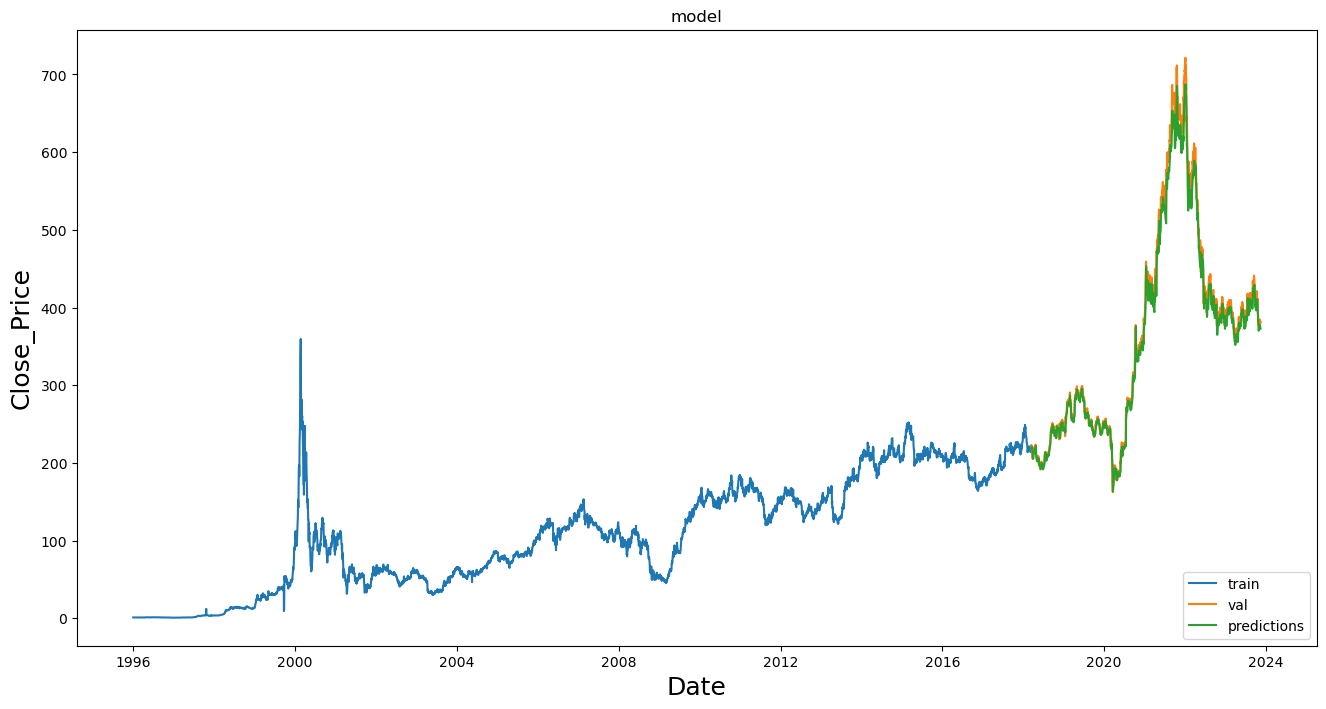

In [44]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

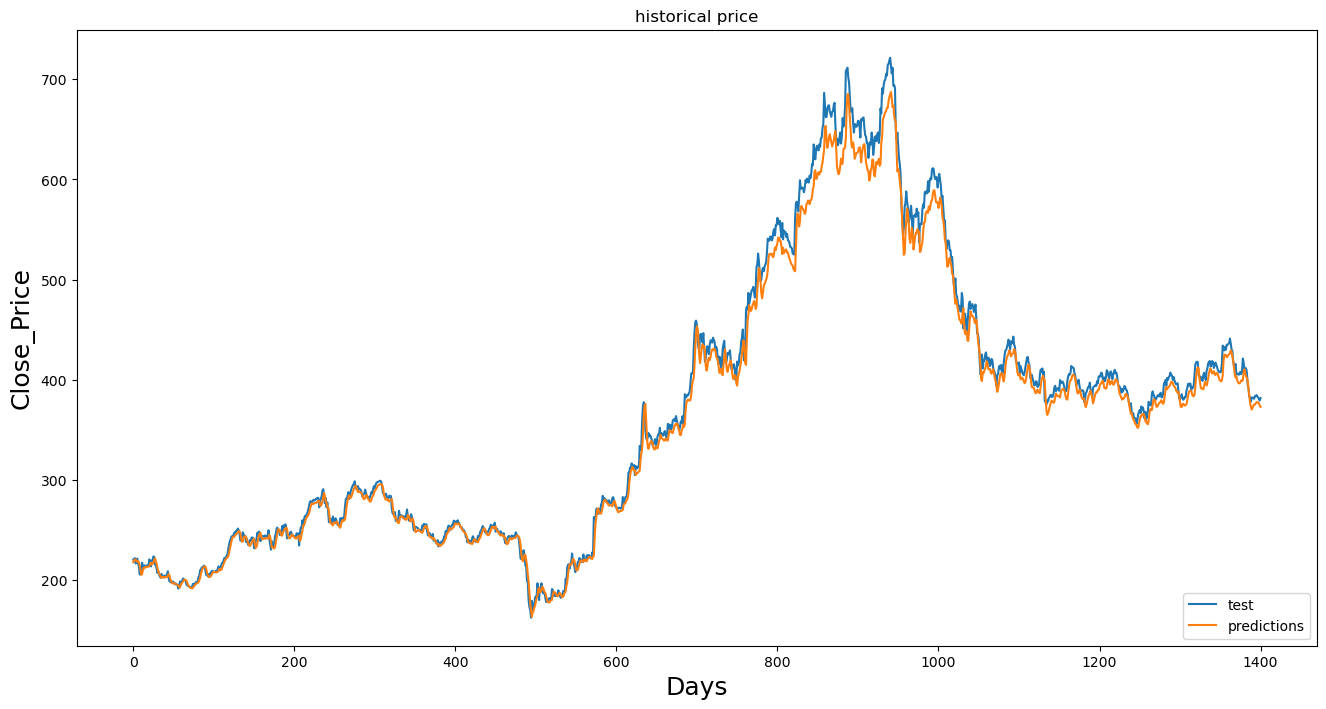

In [45]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()